# NBA MVP Data Final Tutorial
### by Jesse Doris

Welcome to a Data Science tutorial using Jupyter Notebook and Python!

This tutorial serves to be a guide to teach the reader some introductory data science practices, methods, and principles. This is my final project for my CMSC320: Introduction to Data Science course.

For this tutorial, we will be analyzing NBA data for the players that win the Most Valuable Player(MVP) award for the best regular season performance. The data will be used to analyze NBA MVP trends over the years and to predict MVP trends for the future as well as the MVP for the current 2017 season based on pure statistics. This dataset can be found at http://www.basketball-reference.com/awards/mvp.html. 

The data used is from the 1955-2015 seasons on the National Basketball League ONLY. The data from the MVP American Basketball Association from before the NBA league merger in 1976 is ignored.

For more info on the NBA merger:
https://en.wikipedia.org/wiki/American_Basketball_Association%E2%80%93National_Basketball_Association_merger

The tutorial will be organized by the following Data Science pipeline we learned about throughout the course:<br>
Part 1 - Data Collection<br>
Part 2 - Data Processing<br>
Part 3 - Exploratory Data Analysis and Visualization<br>
Part 4 - Hypothesis Testing and Machine Learning<br>
Part 5 - Final Insights

For each Part, the Tutorial for each step will be associated with the number in the code and will provide explanation.

A special thanks to Professor John Dickerson of the University of Maryland for teaching us all of this material during the Spring 2017 semester!


In [336]:
#import all necessary modules into Jupyter Notebook

import numpy as np
import pandas as pd
import requests 
from bs4 import BeautifulSoup
import re
import html5lib
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
import seaborn as sb
from sklearn import linear_model
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from ggplot import *
from sklearn.preprocessing import PolynomialFeatures

## Part 1: Data Collection

In [337]:
# 1) Use HTTP GET request to scrape the NBA MVP Data from the internet 
r = requests.get( "http://www.basketball-reference.com/awards/mvp.html" )

# 2) Use Beautiful Soup to parse the HTML file of the website 
soup = BeautifulSoup( r.content, 'html.parser' )

data = []

# 3) Use Beautiful Soup to find the table data and store in an array
tbl = soup.find( "tbody")

rows = tbl.find_all('tr')
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols])

# 4) Create a pandas dataframe object containing the NBA MVP data (explain dataframe object)
df1 = pd.DataFrame(data)

# 5) Display the dataframe
df1



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,NBA,Stephen Curry,(V),27,GSW,79,34.2,30.1,5.4,6.7,2.1,0.2,.504,.454,.908,17.9,.318
1,NBA,Stephen Curry,(V),26,GSW,80,32.7,23.8,4.3,7.7,2.0,0.2,.487,.443,.914,15.7,.288
2,NBA,Kevin Durant,(V),25,OKC,81,38.5,32.0,7.4,5.5,1.3,0.7,.503,.391,.873,19.2,.295
3,NBA,LeBron James,(V),28,MIA,76,37.9,26.8,8.0,7.3,1.7,0.9,.565,.406,.753,19.3,.322
4,NBA,LeBron James,(V),27,MIA,62,37.5,27.1,7.9,6.2,1.9,0.8,.531,.362,.771,14.5,.298
5,NBA,Derrick Rose,(V),22,CHI,81,37.4,25.0,4.1,7.7,1.0,0.6,.445,.332,.858,13.1,.208
6,NBA,LeBron James,(V),25,CLE,76,39.0,29.7,7.3,8.6,1.6,1.0,.503,.333,.767,18.5,.299
7,NBA,LeBron James,(V),24,CLE,81,37.7,28.4,7.6,7.2,1.7,1.1,.489,.344,.780,20.3,.318
8,NBA,Kobe Bryant,(V),29,LAL,82,38.9,28.3,6.3,5.4,1.8,0.5,.459,.361,.840,13.8,.208
9,NBA,Dirk Nowitzki,(V),28,DAL,78,36.2,24.6,8.9,3.4,0.7,0.8,.502,.416,.904,16.3,.278


### Data Collection Tutorial Steps:

1) First we must scrape the data from the website, and we do this with RESTFUL API queries using HTTP requests. This piece of code is a GET request, which performs a query and returns the HTML file data for the NBA MVP website where the table of NBA statistics is located.

2) Next, we use Beautiful Soup to parse the HTML file in order to extract the MVP data. Beautiful Soup is a Python library for pulling data out of HTML and XML files. The data is stored in a Beautiful Soup object.

3) During this step we find the first table on the website and parse it, storing it in an array. The format of the for-loop looks for tags that are table rows ('tr') and table columns ('td') to organize the data correctly.

4) This part creates a pandas dataframe object out of the array of data. Pandas dataframes allow us to manipulate the data using a variety of analysis methods using Python.

5) Display the data to ensure that it is correct and identically matches the table from the website source.

To learn more about the RESTFUL API, click here: http://www.restapitutorial.com/ <br>
To learn more about Pandas, click here: http://pandas.pydata.org/pandas-docs/stable/tutorials.html

## Part 2: Data Processing

In [338]:
# Tidying the data

# 1) Assign the dataframe variables the appropriate column labels
df1.columns = [ 'league','player','voting','age','team','g','mp','pts','trb','ast','stl','blk','fg','3pt','ft','ws','WS_48']

# 2) Add a column for the season of each NBA MVP
df1.insert(0, 'season', range(1955, 1955 + len(df1)))
df1["season"] = df1["season"].values[::-1]

# 3) Drop columns that are irrevelant or not needed
df1 = df1.drop('voting', 1)
df1 = df1.drop('league', 1)

# 4) Make sure all data that should be numeric is numeric, replace missing data with NaN
df1 = df1.apply(pd.to_numeric, errors='ignore')

# Reverse the data frame so season is in ascending order
df1 = df1.iloc[::-1]
df1 = df1.reset_index(drop=True)

# 5) Display the dataframe
df1


,season,player,age,team,g,mp,pts,trb,ast,stl,blk,fg,3pt,ft,ws,WS_48
0,1955,Bob Pettit,23,STL,72,38.8,25.7,16.2,2.6,NaN,NaN,0.429,NaN,0.736,13.8,0.236
1,1956,Bob Cousy,28,BOS,64,36.9,20.6,4.8,7.5,NaN,NaN,0.378,NaN,0.821,8.8,0.178
2,1957,Bill Russell,23,BOS,69,38.3,16.6,22.7,2.9,NaN,NaN,0.442,NaN,0.519,11.3,0.206
3,1958,Bob Pettit,26,STL,72,39.9,29.2,16.4,3.1,NaN,NaN,0.438,NaN,0.759,14.8,0.246
4,1959,Wilt Chamberlain,23,PHW,72,46.4,37.6,27.0,2.3,NaN,NaN,0.461,NaN,0.582,17.0,0.245
5,1960,Bill Russell,26,BOS,78,44.3,16.9,23.9,3.4,NaN,NaN,0.426,NaN,0.550,13.0,0.181
6,1961,Bill Russell,27,BOS,76,45.2,18.9,23.6,4.5,NaN,NaN,0.457,NaN,0.595,15.5,0.217
7,1962,Bill Russell,28,BOS,78,44.9,16.8,23.6,4.5,NaN,NaN,0.432,NaN,0.555,13.5,0.185
8,1963,Oscar Robertson,25,CIN,79,45.1,31.4,9.9,11.0,NaN,NaN,0.483,NaN,0.853,20.6,0.278
9,1964,Bill Russell,30,BOS,78,44.4,14.1,24.1,5.3,NaN,NaN,0.438,NaN,0.573,16.9,0.234


### Data Processing Tutorial Steps:

Tidying your data is extremely important in order to begin applying data science techniques for anlysis. It is best practice to make sure your pandas dataframe has labels and variable names that are concise and accurately describe the data. This involves naming the columns, filtering/searching for missing data, adding relevant columns, and dropping irrelevant columns. The data in dataframe should ideally all be of the same type, in this case (int) or (float). All missing data from the table should be subsituted for the same NaN value. The data is missing for the earlier years for blocks, steals, and 3 point percentage statistics because these stats did not start getting recorded until a certain time period and onward (1973 for blocks and steals and 1979 for 3 point percentage).

1) Assign labels to each of the column variables. The same labels from the table on the website are used.

2) Add a new column with the data that descrbies which NBA season each MVP award was from

3) Drop columns that are not useful, serve no purpose, or that will not be used in data analysis. League and Voting columns are dropped

4) Ensure that all the statistics data and year are of the numeric type (floats or integers), and replace missing data with NaN value

5) Display the table to make sure it is correct

## Part 3: Exploratory Data Analysis and Visualization

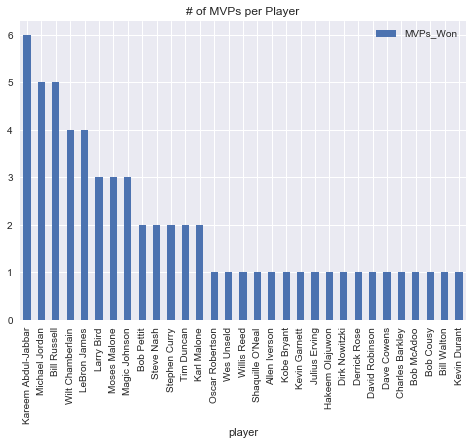

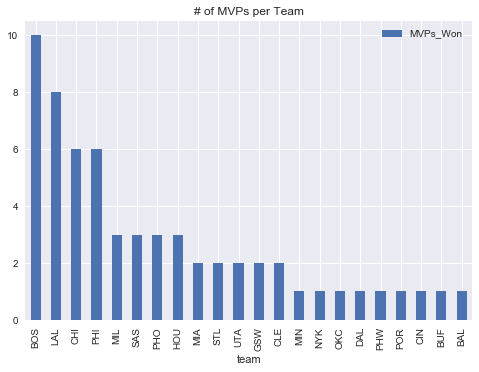

In [339]:
# 1) Group the data by player, and count the number of MVPs each has won
df2 = df1.groupby(['player'],as_index=False).count()
df2 = df2[[0,1]]
df2.columns = ['player', 'MVPs_Won']

# 2) Sort the values in descending order
df2 = df2.sort_values('MVPs_Won', ascending = False)

# 3) Plot the values using a bar graph
df2.plot(x = 'player', y='MVPs_Won',kind = 'bar' , title = '# of MVPs per Player')
plt.show()
plt.gcf().clear()

df3 = df1.groupby(['team'],as_index=False).count()
df3 = df3[[0,1]]
df3.columns = ['team', 'MVPs_Won']
df3 = df3.sort_values('MVPs_Won', ascending = False)
df3.plot(x = 'team', y='MVPs_Won',kind = 'bar', title = '# of MVPs per Team')
plt.show()
plt.gcf().clear()


### Exploratory Data Analysis and Visualization Tutorial Steps:

1) In this part we show how data can be grouped and displayed. The .groupby function groups data by a specific column and calculates a result. For example in this case, the dataset is grouped by the players and team, and the number of MVPs for each team and player are calculated. Other statistics can be calculated by replacing the .count() with .mean() or another function. 

2) The values are sorted in ascending order. It is important for your figures and graphs to be aesthetically pleasing and easy to read, and reorganizing the data often helps achieve this.

3) This is how you plot the data and display it on the graph. With the DataFrame.plot() function, you can chose between a variety of different plotting options. Above we used a bar graph. For a full list of options, see the documentaion here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html

4) **NOTE**: It is important to record your observations once the data is visualized! 

The first figure shows us that Kareem Abdul-Jabbar has won the most MVP awards (6), followed by Michael Jordan (5), Bill Russel (5), Wilt Chamberlain (4), and Lebron James (4).

The second figure shows us that the Boston Celtics have had 10 players win the MVP award, followed by the LA Lakers (8), Chicago Bulls (6), and the Philidelphia 76ers (6).

### More Visualization and Analysis

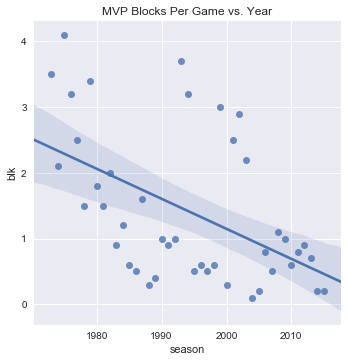

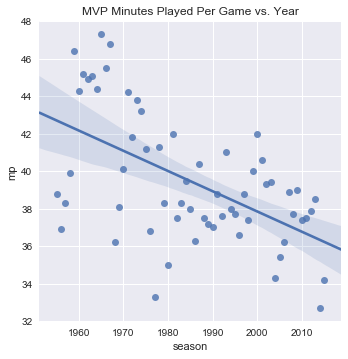

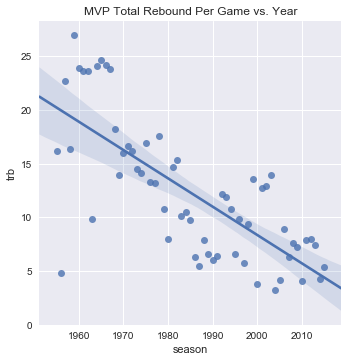

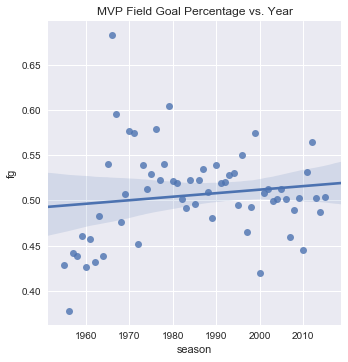

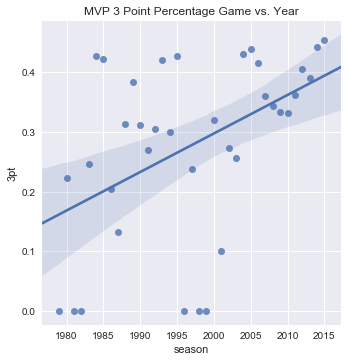

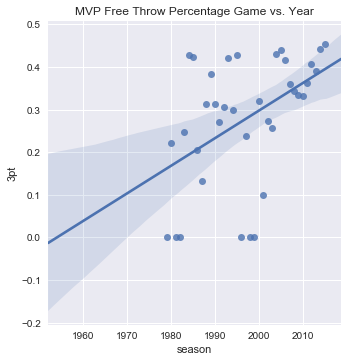

In [340]:
# 1) Drop rows with missing data
df3 = df1.ix[18:]

# 2) Plot the data points using SeaBorn and add a Linear Regression trendline
sb.lmplot(x='season',y='blk',data=df3,fit_reg=True) 

# 3) Title the plot
plt.title('MVP Blocks Per Game vs. Year')

# 4) Show the plot and then clear it
plt.show()
plt.gcf().clear()

sb.lmplot(x='season',y='mp',data=df1,fit_reg=True) 
plt.title("MVP Minutes Played Per Game vs. Year")
plt.show()
plt.gcf().clear()

sb.lmplot(x='season',y='trb',data=df1,fit_reg=True) 
plt.title('MVP Total Rebound Per Game vs. Year')
plt.show()
plt.gcf().clear()

sb.lmplot(x='season',y='fg',data=df1,fit_reg=True) 
plt.title('MVP Field Goal Percentage vs. Year')
plt.show()
plt.gcf().clear()


df4 = df1.ix[24:]
sb.lmplot(x='season',y='3pt',data=df4,fit_reg=True) 
plt.title('MVP 3 Point Percentage Game vs. Year')
plt.show()
plt.gcf().clear()

sb.lmplot(x='season',y='3pt',data=df1,fit_reg=True) 
plt.title('MVP Free Throw Percentage Game vs. Year')
plt.show()
plt.gcf().clear()



### More Exploratory Data Analysis and Visualization Tutorial Steps:

1) Always be mindful of missing data before plotting. Entries with missing data for each statistic are dropped. The reason the data is missing for certain stats was due to the fact that steals and blocks were not a stat that was recorded until 1973, and the 3pt line was not introduced to the sport until the merger in 1979. The rows with missing data are dropped before plotting.

2) Seaborn,a Python visualization library based on matplotlib, is then used to plot the data as a scatter plot, and then a linear regression is preformed on the data to best model the pattern of the observations. For more on Seaborn, click here: https://seaborn.pydata.org/

3) Good figures and graphs are properly well labeled. Here we add a title to the bar graph.

4) This step shows the plot, and then clears it so other data can be plotted directly after it as its own graph.

5) **DONT FORGET**: Remember again to note your observations!

The trends modeled by the scatter plots and linear regression trendlines model some great things about current NBA trends. For example, many people have been criticizing the NBA the past few years by saying that more and more players just don't play defense. It is interesting to see that when it comes to NBA MVP winners, defensive statistics have been descreasing over time.
This can bee seen in the graphs for the defensive statistics for blocks and rebounds.

One of the main reasons players are playing less defense is because in the modern NBA, more focus is put on scoring. Extreme offensive strategy has played a major part in the highly successful NBA teams of the last decade. In the graphs for 3 point percentage, field goal percentage, and free throw percentage, the trend lines all have a positive slope showing that MVP winners are taking more shots and scoring more points.

Side note: It is interesting that MVP winners are playing less and less minutes per game. With MVPs playing less minutes, the data shows that their performance is improving year by year every minute the player is on the court.
 


## Part 4: Machine Learning (Regression)

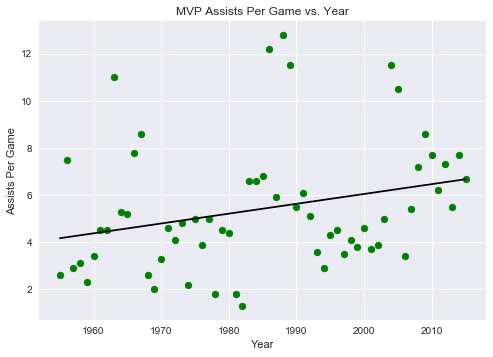

array([ 0.0417028])

In [341]:
# 1) Define the X and Y axises for the regression function
X = df1['season'].values[:,np.newaxis]
Y = df1['ast'].values

# 2) Create a new Linear Regression Objectand fit the model
model = LinearRegression()
model.fit(X, Y)

# 3) Title and set up the graph with labels
plt.title('MVP Assists Per Game vs. Year')
plt.xlabel("Year")
plt.ylabel("Assists Per Game")
plt.scatter(X, Y,color='g')

# 4) Plot the regression graph and show the model
plt.plot(X, model.predict(X),color='k')
plt.show()
model.coef_






### Hypothesis Testing and Machine Learning Tutorial Steps:

The hypothesis here is that the proposed regression model fits the data well. This is also called the Lack-of-fit sum of squares. We are trying to see if we can find a model that accurately represents the data.

This is Least Squares method of machine learning. Here the gradient Theta = (((X^T)*X)^-1)*(X^T)y . The squared error loss function would be l(y',y) = 1/2(y'-y)^2 and the hypothesis function is h(x) = (theta^T)*X .

1) X and Y values must be defined in order to correctly start the machine learning for regression. Here we are taking a look at the year vs assists per game of NBA MVPs

2) A linear regression object must be created to perform the regression.

3) Title the graph with labels and axis names.

4) Plot the graph and show the slopes coefficient.

A look at the regression model shows that the Assists per game of NBA MVPs is increasing, and the R^2 value shows that the model is a good fit!



## Part 5: Final Insights

Congratulations, you have learned a lot from reading this tutorial!

This tutorial that you have just completed has led you through the entire Data Science pipeline.

First, you learned how to scrape data off of an internet webpage using RESTFUL API GET requests and the Beautiful Soup HTML parser. Then you saw how to create a pandas dataframe out of the NBA data that was scraped from the web. Next, you learned about the importance of tidy data, and we cleaned up our pandas dataframe by renaming columns and variables and taking note of/explaining missing values. Eventually, you were taught how to visualize data by using SeaBorn, myplotlib, and pandas. The NBA MVP was graphed in a variety of ways to show MVP statistics trends over the past 60 years. We even used the groupby function to group specific data into categories. Next, we fit the data with some linear regression trend lines to attempt to find a good way to model the data. Lastly, we used machine learning to predict the regression lines in each of the scatter plots.

Overall, I hope you enjoyed reading this tutorial and learning a bit about data science. You even got to learn some pretty interesting facts and trends about the MVPs of the National Basketball League over the past 62 years!
